In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [6]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(-1, 1),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.9, nesterov=True),
                  metrics=['accuracy']                  
                 )
    
    return model

Using TensorFlow backend.


In [7]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.0001
hidden_nodes = 3000
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint]
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 [==============================] - 0s 607us/step - loss: 0.7432 - acc: 0.5297 - val_loss: 0.6513 - val_acc: 0.6316
Epoch 2/1000
455/455 [==============================] - 0s 124us/step - loss: 0.6001 - acc: 0.6747 - val_loss: 0.5389 - val_acc: 0.7632
Epoch 3/1000
455/455 [==============================] - 0s 134us/step - loss: 0.5144 - acc: 0.7934 - val_loss: 0.4657 - val_acc: 0.8158
Epoch 4/1000
455/455 [==============================] - 0s 133us/step - loss: 0.4533 - acc: 0.8681 - val_loss: 0.4172 - val_acc: 0.8509
Epoch 5/1000
455/455 [==============================] - 0s 122us/step - loss: 0.4087 - acc: 0.8791 - val_loss: 0.3846 - val_acc: 0.8772
Epoch 6/1000
455/455 [==============================] - 0s 124us/step - loss: 0.3781 - acc: 0.8923 - val_loss: 0.3589 - val_acc: 0.8947
Epoch 7/1000
455/455 [==============================] - 0s 110us/step - loss: 0.3541 - acc: 0.9055 - val_loss: 0.3399 - val_acc: 0.8947
Ep

455/455 [==============================] - 0s 119us/step - loss: 0.1977 - acc: 0.9275 - val_loss: 0.2199 - val_acc: 0.9211
Epoch 61/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1965 - acc: 0.9209 - val_loss: 0.2182 - val_acc: 0.9211
Epoch 62/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1955 - acc: 0.9253 - val_loss: 0.2212 - val_acc: 0.9211
Epoch 63/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1959 - acc: 0.9297 - val_loss: 0.2202 - val_acc: 0.9211
Epoch 64/1000
455/455 [==============================] - 0s 113us/step - loss: 0.1945 - acc: 0.9253 - val_loss: 0.2215 - val_acc: 0.9211
Epoch 65/1000
455/455 [==============================] - 0s 116us/step - loss: 0.1939 - acc: 0.9297 - val_loss: 0.2195 - val_acc: 0.9211
Epoch 66/1000
455/455 [==============================] - 0s 117us/step - loss: 0.1934 - acc: 0.9275 - val_loss: 0.2180 - val_acc: 0.9211
Epoch 67/1000
455/455 [==============================] -

Epoch 120/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1756 - acc: 0.9297 - val_loss: 0.2087 - val_acc: 0.9211
Epoch 121/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1749 - acc: 0.9297 - val_loss: 0.2144 - val_acc: 0.9123
Epoch 122/1000
455/455 [==============================] - 0s 112us/step - loss: 0.1777 - acc: 0.9297 - val_loss: 0.2116 - val_acc: 0.9123
Epoch 123/1000
455/455 [==============================] - 0s 133us/step - loss: 0.1747 - acc: 0.9297 - val_loss: 0.2116 - val_acc: 0.9123
Epoch 124/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1747 - acc: 0.9319 - val_loss: 0.2084 - val_acc: 0.9211
Epoch 125/1000
455/455 [==============================] - 0s 110us/step - loss: 0.1738 - acc: 0.9297 - val_loss: 0.2087 - val_acc: 0.9211
Epoch 126/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1751 - acc: 0.9297 - val_loss: 0.2086 - val_acc: 0.9211
Epoch 127/1000
455/455 [==========

455/455 [==============================] - 0s 102us/step - loss: 0.1657 - acc: 0.9297 - val_loss: 0.2029 - val_acc: 0.9211
Epoch 180/1000
455/455 [==============================] - 0s 112us/step - loss: 0.1653 - acc: 0.9319 - val_loss: 0.2071 - val_acc: 0.9123
Epoch 181/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1640 - acc: 0.9319 - val_loss: 0.2024 - val_acc: 0.9211
Epoch 182/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1646 - acc: 0.9319 - val_loss: 0.2015 - val_acc: 0.9211
Epoch 183/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1645 - acc: 0.9297 - val_loss: 0.2004 - val_acc: 0.9211
Epoch 184/1000
455/455 [==============================] - 0s 111us/step - loss: 0.1639 - acc: 0.9319 - val_loss: 0.2018 - val_acc: 0.9211
Epoch 185/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1635 - acc: 0.9297 - val_loss: 0.2015 - val_acc: 0.9211
Epoch 186/1000
455/455 [===========================

455/455 [==============================] - 0s 130us/step - loss: 0.1591 - acc: 0.9341 - val_loss: 0.2004 - val_acc: 0.9211
Epoch 239/1000
455/455 [==============================] - 0s 170us/step - loss: 0.1571 - acc: 0.9319 - val_loss: 0.1978 - val_acc: 0.9211
Epoch 240/1000
455/455 [==============================] - 0s 170us/step - loss: 0.1576 - acc: 0.9297 - val_loss: 0.1984 - val_acc: 0.9211
Epoch 241/1000
455/455 [==============================] - 0s 181us/step - loss: 0.1573 - acc: 0.9319 - val_loss: 0.2001 - val_acc: 0.9211
Epoch 242/1000
455/455 [==============================] - 0s 116us/step - loss: 0.1577 - acc: 0.9341 - val_loss: 0.2000 - val_acc: 0.9211
Epoch 243/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1572 - acc: 0.9341 - val_loss: 0.1980 - val_acc: 0.9211
Epoch 244/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1593 - acc: 0.9319 - val_loss: 0.1963 - val_acc: 0.9211
Epoch 245/1000
455/455 [==========================

455/455 [==============================] - 0s 129us/step - loss: 0.1551 - acc: 0.9319 - val_loss: 0.1976 - val_acc: 0.9123
Epoch 298/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1522 - acc: 0.9363 - val_loss: 0.1935 - val_acc: 0.9211
Epoch 299/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1528 - acc: 0.9319 - val_loss: 0.1952 - val_acc: 0.9211
Epoch 300/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1521 - acc: 0.9341 - val_loss: 0.1958 - val_acc: 0.9211
Epoch 301/1000
455/455 [==============================] - 0s 90us/step - loss: 0.1515 - acc: 0.9341 - val_loss: 0.1957 - val_acc: 0.9211
Epoch 302/1000
455/455 [==============================] - 0s 122us/step - loss: 0.1530 - acc: 0.9341 - val_loss: 0.1935 - val_acc: 0.9211
Epoch 303/1000
455/455 [==============================] - 0s 104us/step - loss: 0.1529 - acc: 0.9363 - val_loss: 0.1967 - val_acc: 0.9211
Epoch 304/1000
455/455 [=============================

455/455 [==============================] - 0s 102us/step - loss: 0.1477 - acc: 0.9341 - val_loss: 0.1921 - val_acc: 0.9211
Epoch 357/1000
455/455 [==============================] - 0s 105us/step - loss: 0.1471 - acc: 0.9363 - val_loss: 0.1943 - val_acc: 0.9211
Epoch 358/1000
455/455 [==============================] - 0s 104us/step - loss: 0.1523 - acc: 0.9319 - val_loss: 0.1954 - val_acc: 0.9035
Epoch 359/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1473 - acc: 0.9363 - val_loss: 0.1909 - val_acc: 0.9211
Epoch 360/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1479 - acc: 0.9385 - val_loss: 0.1918 - val_acc: 0.9211
Epoch 361/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1477 - acc: 0.9363 - val_loss: 0.1896 - val_acc: 0.9211
Epoch 362/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1481 - acc: 0.9363 - val_loss: 0.1902 - val_acc: 0.9211
Epoch 363/1000
455/455 [=============================

455/455 [==============================] - 0s 106us/step - loss: 0.1443 - acc: 0.9385 - val_loss: 0.1924 - val_acc: 0.9211
Epoch 416/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1445 - acc: 0.9363 - val_loss: 0.1916 - val_acc: 0.9123
Epoch 417/1000
455/455 [==============================] - 0s 102us/step - loss: 0.1438 - acc: 0.9363 - val_loss: 0.1927 - val_acc: 0.9123
Epoch 418/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1444 - acc: 0.9363 - val_loss: 0.1923 - val_acc: 0.9123
Epoch 419/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1437 - acc: 0.9363 - val_loss: 0.1953 - val_acc: 0.9035
Epoch 420/1000
455/455 [==============================] - 0s 91us/step - loss: 0.1439 - acc: 0.9341 - val_loss: 0.1913 - val_acc: 0.9211
Epoch 421/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1432 - acc: 0.9363 - val_loss: 0.1904 - val_acc: 0.9211
Epoch 422/1000
455/455 [=============================

455/455 [==============================] - 0s 137us/step - loss: 0.1399 - acc: 0.9363 - val_loss: 0.1864 - val_acc: 0.9211
Epoch 475/1000
455/455 [==============================] - 0s 129us/step - loss: 0.1408 - acc: 0.9385 - val_loss: 0.1896 - val_acc: 0.9211
Epoch 476/1000
455/455 [==============================] - 0s 130us/step - loss: 0.1419 - acc: 0.9341 - val_loss: 0.1954 - val_acc: 0.9035
Epoch 477/1000
455/455 [==============================] - 0s 121us/step - loss: 0.1409 - acc: 0.9363 - val_loss: 0.1889 - val_acc: 0.9211
Epoch 478/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1397 - acc: 0.9385 - val_loss: 0.1890 - val_acc: 0.9211
Epoch 479/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1400 - acc: 0.9385 - val_loss: 0.1916 - val_acc: 0.9123
Epoch 480/1000
455/455 [==============================] - 0s 106us/step - loss: 0.1418 - acc: 0.9363 - val_loss: 0.1883 - val_acc: 0.9123
Epoch 481/1000
455/455 [===========================

455/455 [==============================] - 0s 118us/step - loss: 0.1370 - acc: 0.9385 - val_loss: 0.1894 - val_acc: 0.9211
Epoch 534/1000
455/455 [==============================] - 0s 126us/step - loss: 0.1386 - acc: 0.9341 - val_loss: 0.1890 - val_acc: 0.9123
Epoch 535/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1385 - acc: 0.9363 - val_loss: 0.1868 - val_acc: 0.9211
Epoch 536/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1374 - acc: 0.9363 - val_loss: 0.1873 - val_acc: 0.9211
Epoch 537/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1378 - acc: 0.9385 - val_loss: 0.1877 - val_acc: 0.9211
Epoch 538/1000
455/455 [==============================] - 0s 117us/step - loss: 0.1388 - acc: 0.9363 - val_loss: 0.1881 - val_acc: 0.9211
Epoch 539/1000
455/455 [==============================] - 0s 105us/step - loss: 0.1364 - acc: 0.9385 - val_loss: 0.1916 - val_acc: 0.9123
Epoch 540/1000
455/455 [==========================

455/455 [==============================] - 0s 109us/step - loss: 0.1340 - acc: 0.9363 - val_loss: 0.1859 - val_acc: 0.9211
Epoch 593/1000
455/455 [==============================] - 0s 135us/step - loss: 0.1335 - acc: 0.9385 - val_loss: 0.1859 - val_acc: 0.9211
Epoch 594/1000
455/455 [==============================] - 0s 109us/step - loss: 0.1349 - acc: 0.9407 - val_loss: 0.1845 - val_acc: 0.9123
Epoch 595/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1338 - acc: 0.9407 - val_loss: 0.1843 - val_acc: 0.9123
Epoch 596/1000
455/455 [==============================] - 0s 92us/step - loss: 0.1337 - acc: 0.9407 - val_loss: 0.1857 - val_acc: 0.9211
Epoch 597/1000
455/455 [==============================] - 0s 86us/step - loss: 0.1336 - acc: 0.9407 - val_loss: 0.1844 - val_acc: 0.9123
Epoch 598/1000
455/455 [==============================] - 0s 88us/step - loss: 0.1345 - acc: 0.9407 - val_loss: 0.1867 - val_acc: 0.9211
Epoch 599/1000
455/455 [=============================

455/455 [==============================] - 0s 108us/step - loss: 0.1327 - acc: 0.9385 - val_loss: 0.1864 - val_acc: 0.9211
Epoch 652/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1329 - acc: 0.9429 - val_loss: 0.1829 - val_acc: 0.9123
Epoch 653/1000
455/455 [==============================] - 0s 131us/step - loss: 0.1321 - acc: 0.9429 - val_loss: 0.1855 - val_acc: 0.9123
Epoch 654/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1326 - acc: 0.9385 - val_loss: 0.1854 - val_acc: 0.9123
Epoch 655/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1313 - acc: 0.9407 - val_loss: 0.1847 - val_acc: 0.9211
Epoch 656/1000
455/455 [==============================] - 0s 89us/step - loss: 0.1311 - acc: 0.9407 - val_loss: 0.1860 - val_acc: 0.9211
Epoch 657/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1318 - acc: 0.9385 - val_loss: 0.1873 - val_acc: 0.9211
Epoch 658/1000
455/455 [==============================

455/455 [==============================] - 0s 129us/step - loss: 0.1296 - acc: 0.9385 - val_loss: 0.1826 - val_acc: 0.9123
Epoch 711/1000
455/455 [==============================] - 0s 130us/step - loss: 0.1295 - acc: 0.9429 - val_loss: 0.1807 - val_acc: 0.9211
Epoch 712/1000
455/455 [==============================] - 0s 135us/step - loss: 0.1293 - acc: 0.9429 - val_loss: 0.1837 - val_acc: 0.9211
Epoch 713/1000
455/455 [==============================] - 0s 164us/step - loss: 0.1289 - acc: 0.9407 - val_loss: 0.1846 - val_acc: 0.9211
Epoch 714/1000
455/455 [==============================] - 0s 124us/step - loss: 0.1289 - acc: 0.9429 - val_loss: 0.1842 - val_acc: 0.9123
Epoch 715/1000
455/455 [==============================] - 0s 129us/step - loss: 0.1293 - acc: 0.9385 - val_loss: 0.1838 - val_acc: 0.9123
Epoch 716/1000
455/455 [==============================] - 0s 120us/step - loss: 0.1285 - acc: 0.9429 - val_loss: 0.1823 - val_acc: 0.9211
Epoch 717/1000
455/455 [=========================

455/455 [==============================] - 0s 101us/step - loss: 0.1278 - acc: 0.9407 - val_loss: 0.1863 - val_acc: 0.9211
Epoch 770/1000
455/455 [==============================] - 0s 113us/step - loss: 0.1271 - acc: 0.9429 - val_loss: 0.1824 - val_acc: 0.9123
Epoch 771/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1266 - acc: 0.9429 - val_loss: 0.1858 - val_acc: 0.9123
Epoch 772/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1262 - acc: 0.9429 - val_loss: 0.1827 - val_acc: 0.9211
Epoch 773/1000
455/455 [==============================] - 0s 97us/step - loss: 0.1261 - acc: 0.9429 - val_loss: 0.1843 - val_acc: 0.9123
Epoch 774/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1258 - acc: 0.9429 - val_loss: 0.1849 - val_acc: 0.9211
Epoch 775/1000
455/455 [==============================] - 0s 114us/step - loss: 0.1269 - acc: 0.9429 - val_loss: 0.1843 - val_acc: 0.9211
Epoch 776/1000
455/455 [============================

455/455 [==============================] - 0s 87us/step - loss: 0.1247 - acc: 0.9429 - val_loss: 0.1812 - val_acc: 0.9211
Epoch 829/1000
455/455 [==============================] - 0s 94us/step - loss: 0.1241 - acc: 0.9429 - val_loss: 0.1813 - val_acc: 0.9211
Epoch 830/1000
455/455 [==============================] - 0s 108us/step - loss: 0.1241 - acc: 0.9429 - val_loss: 0.1814 - val_acc: 0.9211
Epoch 831/1000
455/455 [==============================] - 0s 113us/step - loss: 0.1248 - acc: 0.9429 - val_loss: 0.1812 - val_acc: 0.9211
Epoch 832/1000
455/455 [==============================] - 0s 93us/step - loss: 0.1267 - acc: 0.9451 - val_loss: 0.1842 - val_acc: 0.9035
Epoch 833/1000
455/455 [==============================] - 0s 96us/step - loss: 0.1246 - acc: 0.9429 - val_loss: 0.1804 - val_acc: 0.9211
Epoch 834/1000
455/455 [==============================] - 0s 85us/step - loss: 0.1240 - acc: 0.9429 - val_loss: 0.1810 - val_acc: 0.9211
Epoch 835/1000
455/455 [==============================

455/455 [==============================] - 0s 101us/step - loss: 0.1232 - acc: 0.9429 - val_loss: 0.1799 - val_acc: 0.9211
Epoch 888/1000
455/455 [==============================] - 0s 118us/step - loss: 0.1223 - acc: 0.9429 - val_loss: 0.1862 - val_acc: 0.9123
Epoch 889/1000
455/455 [==============================] - 0s 113us/step - loss: 0.1250 - acc: 0.9495 - val_loss: 0.1820 - val_acc: 0.9123
Epoch 890/1000
455/455 [==============================] - 0s 95us/step - loss: 0.1229 - acc: 0.9429 - val_loss: 0.1801 - val_acc: 0.9211
Epoch 891/1000
455/455 [==============================] - 0s 99us/step - loss: 0.1219 - acc: 0.9429 - val_loss: 0.1791 - val_acc: 0.9211
Epoch 892/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1220 - acc: 0.9429 - val_loss: 0.1785 - val_acc: 0.9211
Epoch 893/1000
455/455 [==============================] - 0s 107us/step - loss: 0.1217 - acc: 0.9429 - val_loss: 0.1799 - val_acc: 0.9211
Epoch 894/1000
455/455 [===========================

455/455 [==============================] - 0s 117us/step - loss: 0.1198 - acc: 0.9429 - val_loss: 0.1802 - val_acc: 0.9211
Epoch 947/1000
455/455 [==============================] - 0s 100us/step - loss: 0.1198 - acc: 0.9451 - val_loss: 0.1805 - val_acc: 0.9211
Epoch 948/1000
455/455 [==============================] - 0s 102us/step - loss: 0.1191 - acc: 0.9429 - val_loss: 0.1797 - val_acc: 0.9211
Epoch 949/1000
455/455 [==============================] - 0s 103us/step - loss: 0.1194 - acc: 0.9429 - val_loss: 0.1790 - val_acc: 0.9211
Epoch 950/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1191 - acc: 0.9429 - val_loss: 0.1796 - val_acc: 0.9211
Epoch 951/1000
455/455 [==============================] - 0s 98us/step - loss: 0.1195 - acc: 0.9429 - val_loss: 0.1797 - val_acc: 0.9211
Epoch 952/1000
455/455 [==============================] - 0s 101us/step - loss: 0.1209 - acc: 0.9451 - val_loss: 0.1813 - val_acc: 0.9211
Epoch 953/1000
455/455 [===========================

In [8]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [9]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.954
best validation accuracy: 0.921


# Weight analysis

In [10]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return l.shape[0] - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(0)

# Graphics

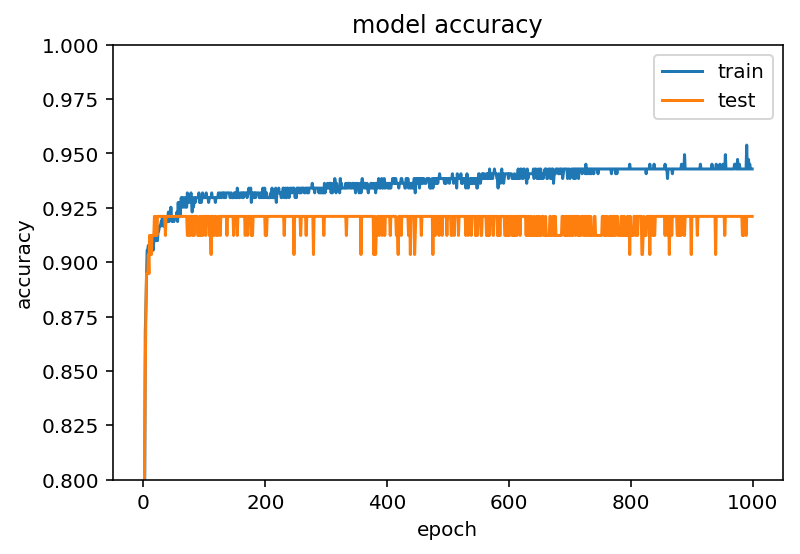

In [36]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.ylim([0.8, 1.0])
plt.show()

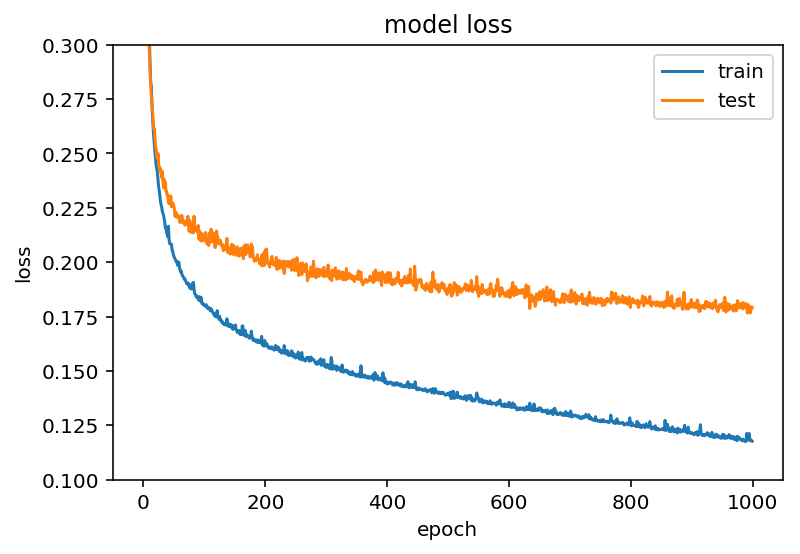

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.ylim([.1, .3])
plt.show()

In [13]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(r['w1']))
    first_layer_bias_avg.append(np.average(r['b1']))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(r['w2']))
    second_layer_bias_avg.append(np.average(r['b2']))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

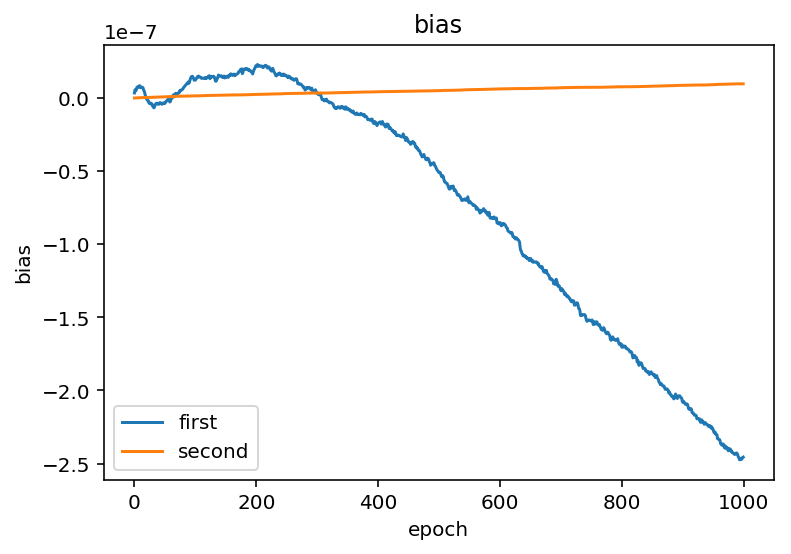

In [26]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='best')
# plt.ylim([-3e-9, 6e-9])
# plt.ylim([, 6e-9])
plt.show()

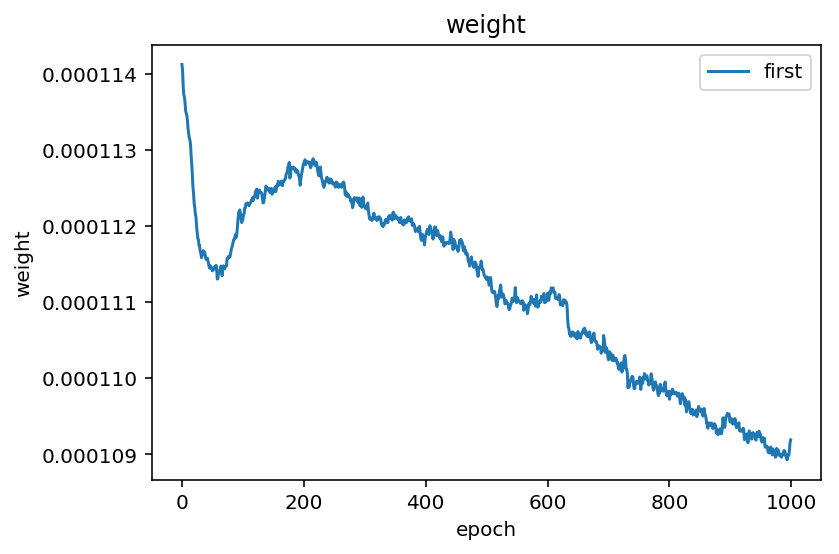

In [27]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

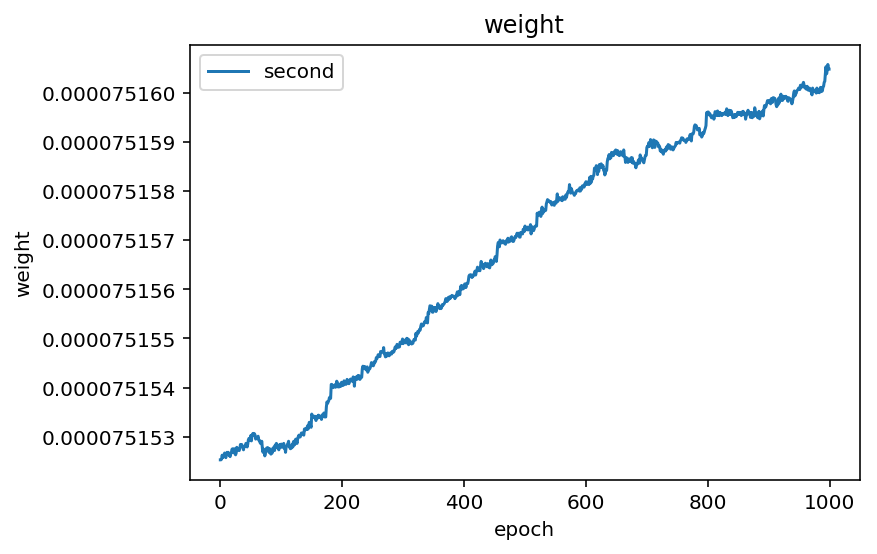

In [28]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

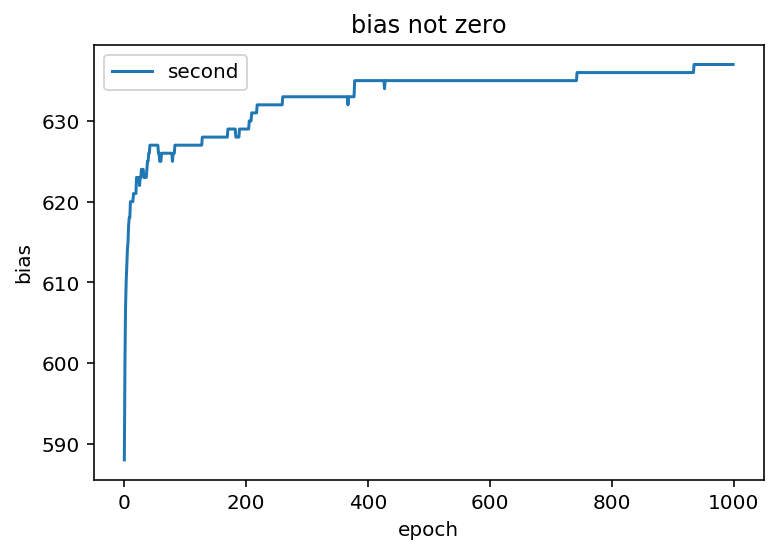

In [29]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

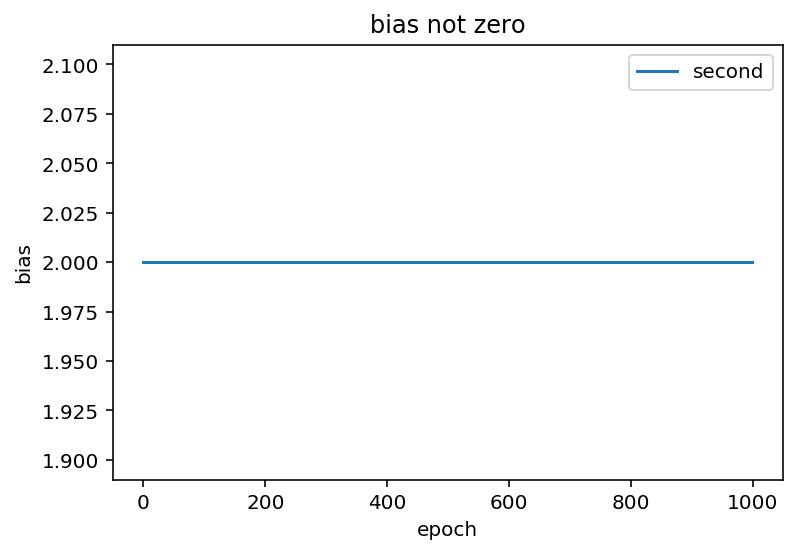

In [30]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

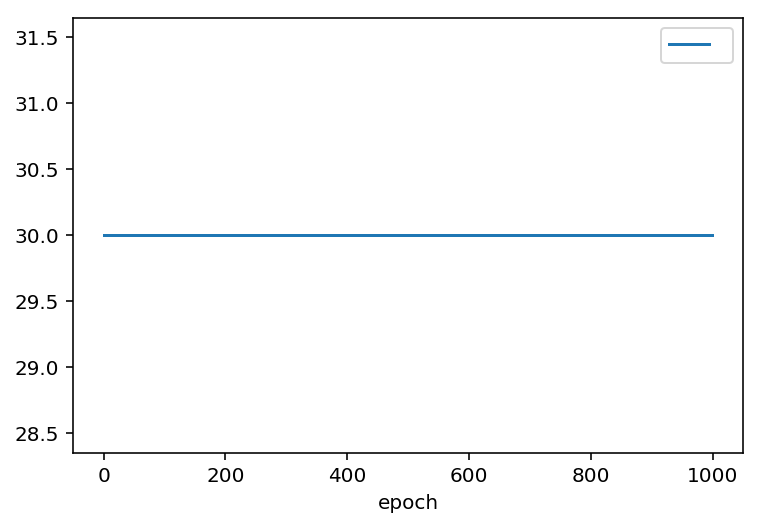

In [31]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

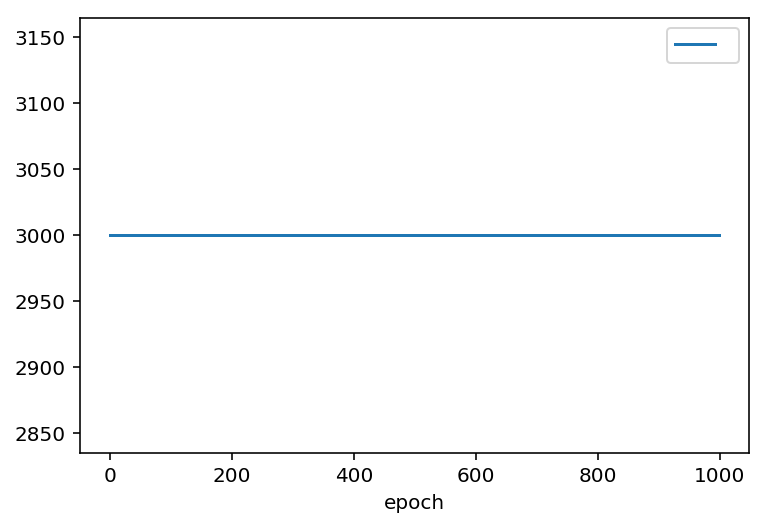

In [32]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

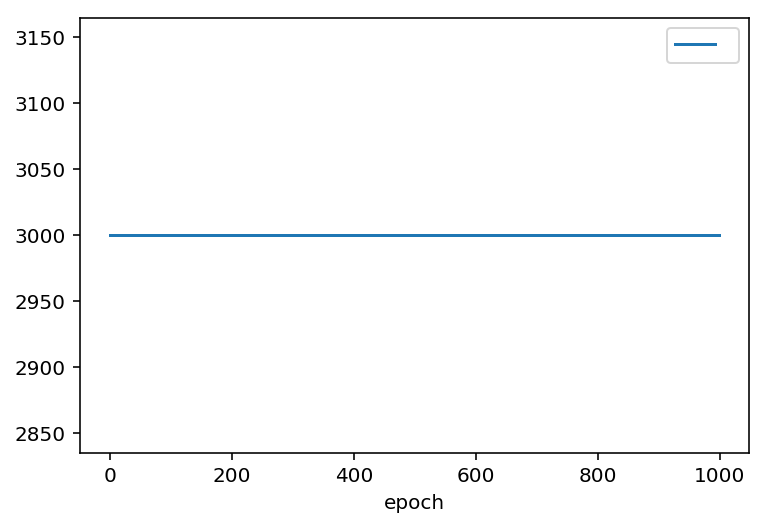

In [33]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()

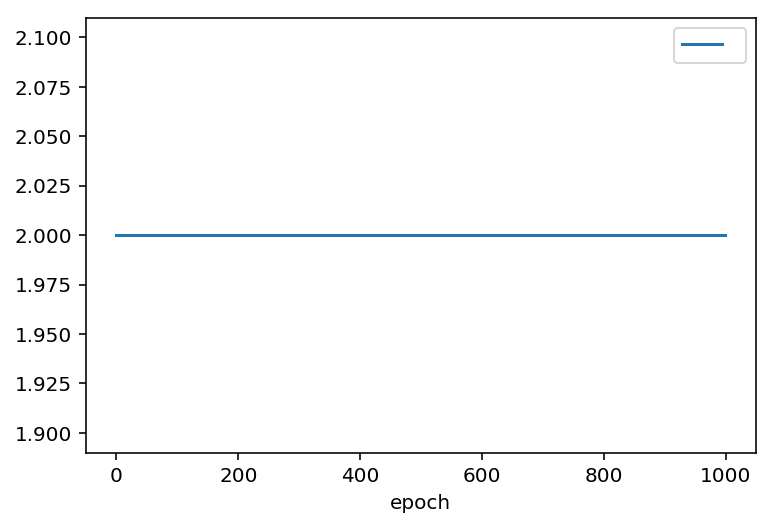

In [34]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='best')
# plt.ylim([-1e-7, 3e-7])
plt.show()